<a href="https://colab.research.google.com/github/alonsosilvaallende/COVID-19/blob/master/AddingSpain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

In [0]:
total_cases = pd.read_csv("https://covid.ourworldindata.org/data/total_cases.csv")

In [0]:
EU_list = ['France', 'Italy', 'Spain']

In [0]:
cases100 = {}
for country in EU_list:
  cases100[country] = total_cases[country][total_cases[country] > 100]

On February 24, Italy reaches more than 100 cases and on March 8 Italy imposes lockdown. On March 3, Spain reaches more than 100 cases and on March 15 Spain imposes lockdown.

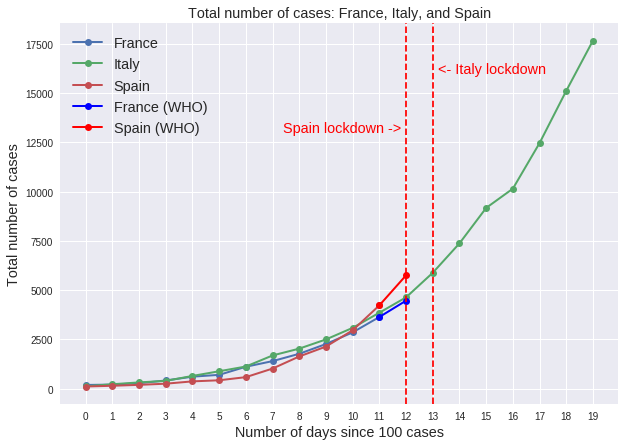

In [5]:
fig, ax = plt.subplots(figsize=(10,7))
for country in EU_list:
  plt.plot(np.arange(len(cases100[country])), cases100[country], label=country, linewidth=2, marker='o')
plt.plot(np.array([11, 12]), np.array([3640, 4469]), label='France (WHO)', color='blue', linewidth=2, marker='o')
plt.plot(np.array([11, 12]), np.array([4231, 5753]), label='Spain (WHO)', color='red', linewidth=2, marker='o')
plt.axvline(12, color='red', linestyle='dashed')
plt.axvline(13, color='red', linestyle='dashed')
plt.annotate('<- Italy lockdown', (13.2,16000.0), color='red', fontsize='x-large')
plt.annotate('Spain lockdown ->', (7.4,13000.0), color='red', fontsize='x-large')
ax.set_title('Total number of cases: France, Italy, and Spain', fontsize='x-large')
ax.set_xlabel('Number of days since 100 cases', fontsize='x-large')
ax.set_ylabel('Total number of cases', fontsize='x-large')
ax.set_xticks(np.arange(len(cases100["Italy"])))
plt.legend(fontsize='x-large')
plt.show()

In logarithmic scale:

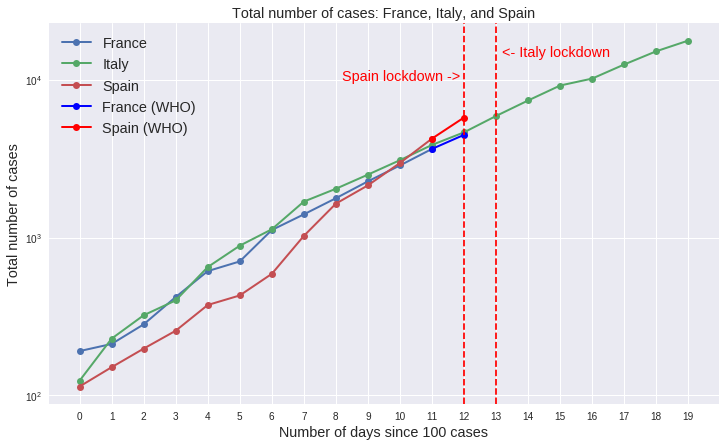

In [6]:
fig, ax = plt.subplots(figsize=(12,7))
for country in EU_list:
  plt.plot(np.arange(len(cases100[country])), cases100[country], label=country, linewidth=2, marker='o')
plt.plot(np.array([11, 12]), np.array([3640, 4469]), label='France (WHO)', color='blue', linewidth=2, marker='o')
plt.plot(np.array([11, 12]), np.array([4231, 5753]), label='Spain (WHO)', color='red', linewidth=2, marker='o')
plt.axvline(12, color='red', linestyle='dashed')
plt.axvline(13, color='red', linestyle='dashed')
plt.annotate('<- Italy lockdown', (13.2,14000.0), color='red', fontsize='x-large')
plt.annotate('Spain lockdown ->', (8.2,10000.0), color='red', fontsize='x-large')
ax.set_title('Total number of cases: France, Italy, and Spain', fontsize='x-large')
ax.set_xlabel('Number of days since 100 cases', fontsize='x-large')
ax.set_ylabel('Total number of cases', fontsize='x-large')
ax.set_xticks(np.arange(len(cases100["Italy"])))
plt.yscale("log")
plt.legend(fontsize='x-large')
plt.show()